In [18]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [19]:
x = np.loadtxt('ex1x.dat')
y = np.loadtxt('ex1y.dat')

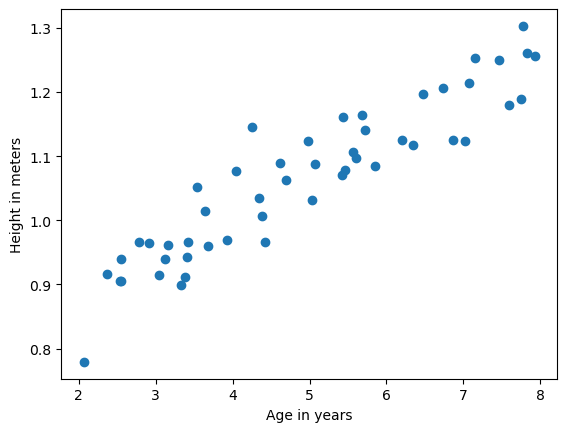

In [20]:
plt.plot(x, y, 'o')
plt.ylabel('Height in meters')
plt.xlabel('Age in years')
plt.show()

In [21]:
m = len(y)
x = np.c_[np.ones(m), x]

In [22]:
n = 1
theta = np.zeros(n + 1)

alpha = 0.07

class Optimizer:
    def __init__(self, x: np.ndarray, y: np.ndarray, theta: np.ndarray, alpha: float):
        self.x = x
        self.y = y
        self.theta = theta
        self.alpha = alpha

    def forward(self):
        return np.dot(self.x, self.theta)

    def gradient(self):
        h = self.forward()
        xp = x[:, 1]
        return np.array([np.sum(h - y) / m, np.sum((h - y) * xp) / m])

    def step(self):
        self.theta -= self.alpha * self.gradient()

In [23]:
optimizer = Optimizer(x, y, theta, alpha)

for i in range(1500):
    optimizer.step()
    if (i == 0):
        print(f'theta = {optimizer.theta}')

print(f'theta = {optimizer.theta}')

theta = [0.07452802 0.38002167]
theta = [0.75015039 0.06388338]


Text(0.5, 1.0, 'Linear regression')

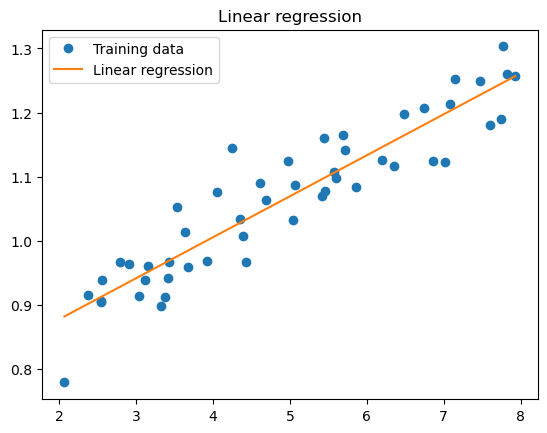

In [64]:
plt.plot(x[:, 1], y, 'o')
plt.plot(x[:, 1], optimizer.forward())
plt.legend(['Training data', 'Linear regression'])
plt.title('Linear regression')

In [25]:
predict_x = np.array([3.5, 7])
predict_x = np.c_[np.ones(2), predict_x]
predict_y = np.dot(predict_x, optimizer.theta)

print(predict_y)

[0.97374221 1.19733402]


In [33]:
J_vals = np.zeros((100, 100))
theta0_vals = np.linspace(-3, 3, 100)
theta1_vals = np.linspace(-1, 1, 100)

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        J_vals[i, j] = np.sum((np.dot(x, t) - y) ** 2) / (2 * m)

Text(0.5, 0.92, 'J')

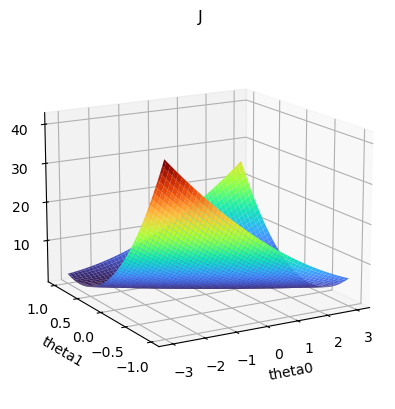

In [65]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=15, azim=-120)

theta0_vals_, theta1_vals_ = np.meshgrid(theta0_vals, theta1_vals)

ax.plot_surface(theta0_vals_, theta1_vals_, J_vals.T, cmap='turbo')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
plt.title('J')

Text(0.5, 1.0, 'Contour, showing minimum')

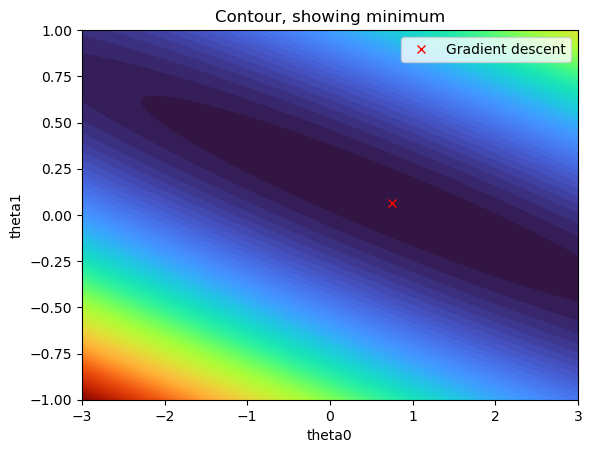

In [84]:
# contour plot
plt.contourf(theta0_vals_, theta1_vals_, J_vals.T, levels=100, cmap='turbo')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(optimizer.theta[0], optimizer.theta[1], 'rx')
plt.legend(['Gradient descent'])
plt.title('Contour, showing minimum')

In [68]:
print(np.logspace(-2, 3, 20))

[1.00000000e-02 1.83298071e-02 3.35981829e-02 6.15848211e-02
 1.12883789e-01 2.06913808e-01 3.79269019e-01 6.95192796e-01
 1.27427499e+00 2.33572147e+00 4.28133240e+00 7.84759970e+00
 1.43844989e+01 2.63665090e+01 4.83293024e+01 8.85866790e+01
 1.62377674e+02 2.97635144e+02 5.45559478e+02 1.00000000e+03]
